In [207]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [208]:
df=pd.read_csv('Churn_Modelling.csv')

In [209]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [210]:
df.shape

(10000, 14)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [212]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [213]:
df.duplicated().sum()

np.int64(0)

In [214]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [215]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [216]:
df.shape

(10000, 11)

In [217]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


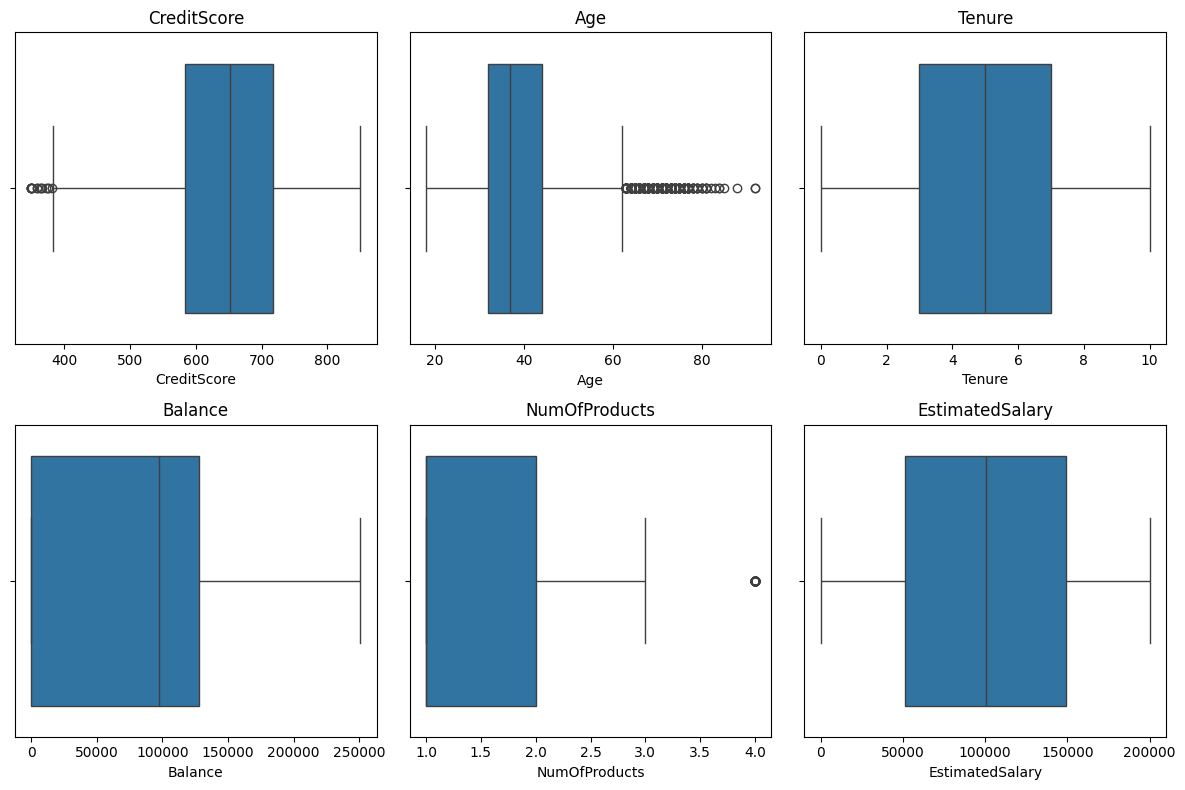

In [218]:
num_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [219]:
num_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

df_outliers = df.copy()

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [220]:
for col in num_cols:
    outliers, low, high = detect_outliers_iqr(df_outliers, col)
    print(f"{col}: {len(outliers)} outliers detected.")


CreditScore: 15 outliers detected.
Age: 359 outliers detected.
Tenure: 0 outliers detected.
Balance: 0 outliers detected.
NumOfProducts: 60 outliers detected.
EstimatedSalary: 0 outliers detected.


In [221]:
for col in num_cols:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers[col] = np.where(df_outliers[col] < lower_bound, lower_bound,
                                np.where(df_outliers[col] > upper_bound, upper_bound, df_outliers[col]))

In [222]:
for col in num_cols:
    outliers, low, high = detect_outliers_iqr(df_outliers, col)
    print(f"{col}: {len(outliers)} outliers detected.")


CreditScore: 0 outliers detected.
Age: 0 outliers detected.
Tenure: 0 outliers detected.
Balance: 0 outliers detected.
NumOfProducts: 0 outliers detected.
EstimatedSalary: 0 outliers detected.


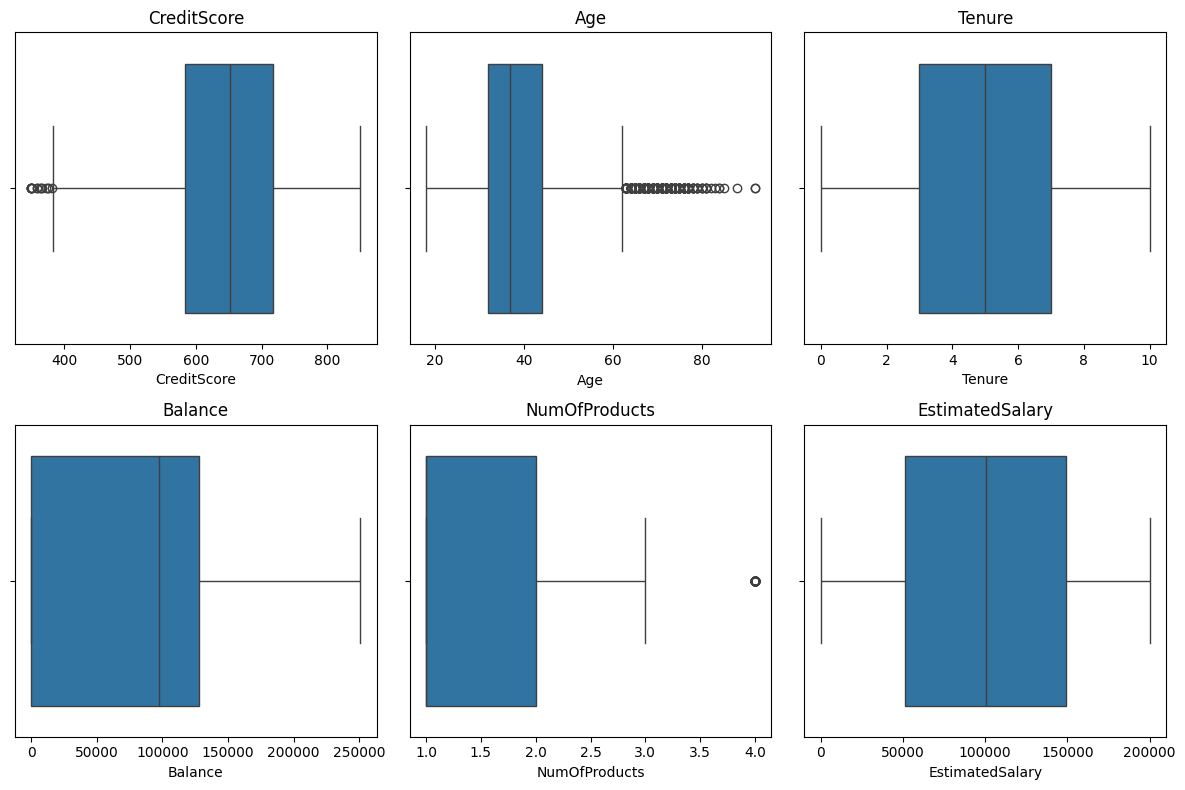

In [223]:
num_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [224]:
df.skew(numeric_only=True)


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [225]:
df['Age'] = np.log1p(df['Age'])

In [226]:
df.skew(numeric_only=True)


CreditScore       -0.071607
Age                0.203360
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

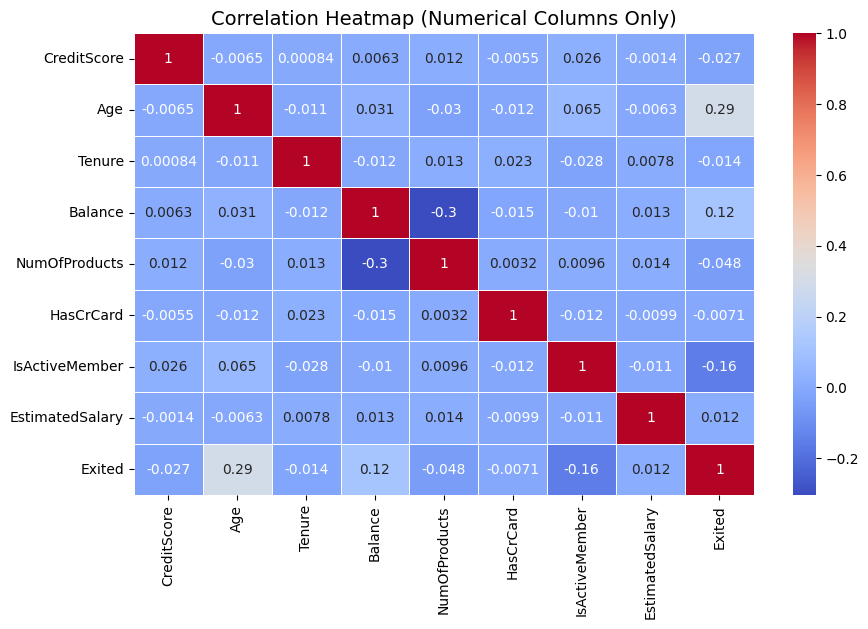

In [227]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

corr = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Columns Only)", fontsize=14)
plt.show()

In [228]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [229]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,3.761200,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,3.737670,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,3.761200,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,3.688879,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,3.784190,2,125510.82,1,1,1,79084.10,0


In [230]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [231]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [233]:
X = pd.get_dummies(X, columns=['Geography'], drop_first=False)

In [234]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,3.761200,2,0.00,1,1,1,101348.88,True,False,False
1,608,0,3.737670,1,83807.86,1,0,1,112542.58,False,False,True
2,502,0,3.761200,8,159660.80,3,1,0,113931.57,True,False,False
3,699,0,3.688879,1,0.00,2,0,0,93826.63,True,False,False
4,850,0,3.784190,2,125510.82,1,1,1,79084.10,False,False,True


In [235]:
X = X.astype(int)

In [236]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,3,2,0,1,1,1,101348,1,0,0
1,608,0,3,1,83807,1,0,1,112542,0,0,1
2,502,0,3,8,159660,3,1,0,113931,1,0,0
3,699,0,3,1,0,2,0,0,93826,1,0,0
4,850,0,3,2,125510,1,1,1,79084,0,0,1


In [237]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [239]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),  # hidden layer 1
    Dense(16, activation='relu'),                        # hidden layer 2
    Dense(len(np.unique(y)), activation='softmax')        # output layer (multi-class)
])

d:\Churn_ANN\ann\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [240]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [241]:
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7970 - loss: 0.4747
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.8317 - loss: 0.3970
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.8360 - loss: 0.3778
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.8371 - loss: 0.3729
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.8389 - loss: 0.3713
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8396 - loss: 0.3675
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.8403 - loss: 0.3663
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.8428 - loss: 0.3652
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.8440 - loss: 0.3633
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.8419 - loss: 0.3614
Epoch 11/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8414 - loss: 0.3610
Epoch 12/50


In [242]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.4108 
Test Accuracy: 82.80%


In [243]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Predicted classes:", y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
Predicted classes: [0 0 0 ... 1 0 0]


In [245]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 86.09%
Testing Accuracy: 82.80%
